# Assignment 4


In [4]:
import numpy as np
import sympy as sp

Task 1

$$ \sqrt{x+a}-\sqrt{x} = (\sqrt{x+a}-\sqrt{x}) \frac{\sqrt{x+a}+\sqrt{x}}{\sqrt{x+a}+\sqrt{x}} = \frac{a}{\sqrt{x+a}+\sqrt{x}} $$

In [20]:

args = [[1, 1e15], [1e15, 1], [1e-20, 1], [1, 1e-20]]

def f1(x, a):
    return np.sqrt(x+a)-np.sqrt(x)

def f2(x, a):
    return a/(np.sqrt(x+a)+np.sqrt(x))

def test(func, x, a):
    return func(x, a)
    
print(test(f1, *args[0]), test(f2, *args[0]))    
print(test(f1, *args[1]), test(f2, *args[1]))
print(test(f1, *args[2]), test(f2, *args[2]))    
print(test(f1, *args[3]), test(f2, *args[3]))

31622775.60168381 31622775.601683807
1.862645149230957e-08 1.5811388300841893e-08
0.9999999999 0.9999999999
0.0 5e-21


In [20]:
x = sp.Symbol('x')
a = sp.Symbol('a')
e = sp.sqrt(x+a)-sp.sqrt(x)
e_dx = sp.diff(e, x)
e_da = sp.diff(e, a)
e_da

1/(2*sqrt(a + x))

Task 2

In [287]:
from mpmath import *
mp . dps = 64 # precision ( in decimal places )
mp . pretty = True
+(10**100)/pi

3.183098861837906715377675267450287240689192914809128974953346881e+99

In [288]:
x = sp.Symbol('x')
f = sp.tan(x)
j = sp.diff(f, x)
k = j/(f/x)

cn

10*(tan(10)**2 + 1)/tan(10)

Task 3

In [289]:
tests = [
    { 'b': 4.0,   'c': 3.0 },
    { 'b': 2.0,   'c': 1.0 },
    { 'b': 0.5,   'c': 4.0 },
    { 'b': 1e10,  'c': 3.0 },
    { 'b': -1e10, 'c': 4.0 },
]

In [290]:
def do_tests(solver):
    def quad(b, c, x):
        return x ** 2 + b * x + c

    solutions = [ ( test, solver(test['b'], test['c']) ) for test in tests ]
    return [ ( test, solution, [ quad(test['b'], test['c'], solution[0]), quad(test['b'], test['c'], solution[1]) ] ) for test, solution in solutions ]

In [291]:
def solve_quad(b, c):
    if b > 0:
        x1 = 2*c/(-b - np.sqrt(b ** 2 - 4 * c + 0J))
    elif b < 0:
        x1 = 2*c/(-b + np.sqrt(b ** 2 - 4 * c + 0J))
    x2 = c/x1    
    return np.array([x1, x2])
    
def solve_quad_n(b, c):
    rootD = np.sqrt(b ** 2 - 4 * c + 0J)
    x = np.array([ -b, -b ]) + np.array([ 1, -1 ]) * rootD
    return x / 2

In [292]:
do_tests(solve_quad)

[({'b': 4.0, 'c': 3.0}, array([-1.-0.j, -3.-0.j]), [0j, 0j]),
 ({'b': 2.0, 'c': 1.0}, array([-1.-0.j, -1.-0.j]), [0j, 0j]),
 ({'b': 0.5, 'c': 4.0},
  array([-0.25+1.98431348j, -0.25-1.98431348j]),
  [(4.440892098500626e-16+2.220446049250313e-16j),
   (-1.7763568394002505e-15+0j)]),
 ({'b': 10000000000.0, 'c': 3.0},
  array([-3.e-10-0.j, -1.e+10-0.j]),
  [0j, (3+0j)]),
 ({'b': -10000000000.0, 'c': 4.0},
  array([4.e-10+0.j, 1.e+10+0.j]),
  [0j, (4+0j)])]

In [293]:
solve = solve_quad(tests[3]['b'], tests[3]['c'])
solve[0] ** 2 + 1e10 * solve[0] + 3

0j

In [294]:
solve[1] ** 2 + 1e10 * solve[1] + 3

(3+0j)

In [295]:
solve = solve_quad_n(tests[4]['b'], tests[4]['c'])
solve[0] ** 2 -1e10*solve[0] + 4

(4+0j)

In [296]:
solve[1] ** 2 - 1e10*solve[1] + 4

(4+0j)

Task 4

0.00210443139076233

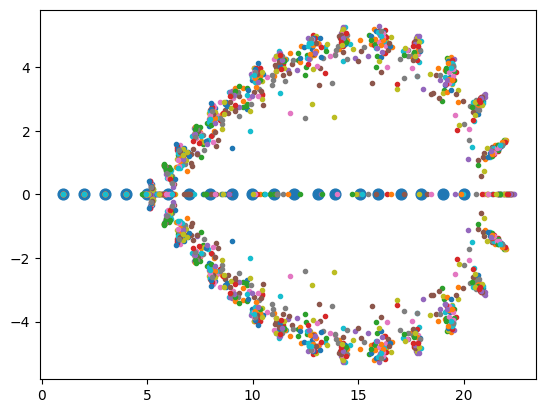

In [196]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

x = sp.Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)

P,d = sp.poly_from_expr(W.expand())

def pertub_poly(coeffs):
    return np.array([a*np.random.normal(1, 1e-10) for a in coeffs])
    
roots = np.roots(np.array(P.coeffs()))

pertub_polynomials = np.array([pertub_poly(coeffs) for i in range(100)])

pertub_roots = np.array([np.roots(pertub_polynomials[i]) for i in range(100)])

fig, axis = plt.subplots()

for i in range(100):
    axis.plot(pertub_roots[i].real, pertub_roots[i].imag, '.')
    
axis.scatter(roots.real, roots.imag, s=60)

delta = pertub_roots[34]-roots
index_sensitive_root = np.argmax(abs(delta))
sensitive_root = pertub_roots[34][ind_most_sensitive_root]
 

abs(pertub_polynomials[34][index_sensitive_root]-P.coeffs()[index_sensitive_root])

Task 6

In [297]:
eps = sp.Symbol('\\epsilon')
A = sp.Matrix([[1, 1],
               [1, 1+eps], 
               [1, 1+eps]])
b = sp.Matrix([2,eps,4+eps])
b

Matrix([
[           2],
[    \epsilon],
[\epsilon + 4]])

In [298]:
x = (A.T @ A).inv() @ A.T @ b
x

Matrix([
[\epsilon*(1 + 2/\epsilon + (-2*\epsilon - 3)*(\epsilon + 1)/(2*\epsilon**2) + 3/(2*\epsilon**2)) + (\epsilon + 4)*(1 + 2/\epsilon + (-2*\epsilon - 3)*(\epsilon + 1)/(2*\epsilon**2) + 3/(2*\epsilon**2)) + 2 + 4/\epsilon + (-2*\epsilon - 3)/\epsilon**2 + 3/\epsilon**2],
[                                                   \epsilon*((-2*\epsilon - 3)/(2*\epsilon**2) + 3*(\epsilon + 1)/(2*\epsilon**2)) + (\epsilon + 4)*((-2*\epsilon - 3)/(2*\epsilon**2) + 3*(\epsilon + 1)/(2*\epsilon**2)) + (-2*\epsilon - 3)/\epsilon**2 + 3/\epsilon**2]])

In [299]:
x = sp.simplify(x)
y = A @ x 
x

Matrix([
[1],
[1]])

In [300]:
def ls_solver(dtype):  
    eps = 0.00001
    A = np.array(
        [ [ 1, 1 ],
          [ 1, 1 + eps ],
          [ 1, 1 + eps ]
        ]
        , dtype = dtype
    )
    b = np.array([ [ 2 ], [ eps ], [ 4 + eps ] ], dtype=dtype)
    x = np.linalg.inv((A.T @ A)) @ A.T @ b
    y = A @ x
    s = np.linalg.svd(A, compute_uv = False)
    print(f'condition_number = {np.max(s)/np.min(s)}')

In [301]:
ls_solver(np.float32)

condition_number = 423691.5


In [302]:
ls_solver(np.float64)

condition_number = 424266.89714833436


In [312]:
def ls_svd_solver(dtype):
    eps = 0.00001
    A = np.array(
        [ [ 1, 1 ],
          [ 1, 1 + eps ],
          [ 1, 1 + eps ]
        ]
        , dtype = dtype
    )
    b = np.array([ [ 2 ], [ eps ], [ 4 + eps ] ], dtype=dtype)
    x = np.linalg.pinv(A) @ b
    y = A @ x
    s = np.linalg.svd(A, compute_uv = False)
    print(f'condition_number = {np.max(s)/np.min(s)}')
    return (x, y)

In [313]:
ls_svd_solver(np.float32)

condition_number = 423691.5


(array([[0.984375],
        [1.015625]], dtype=float32),
 array([[2.     ],
        [2.00001],
        [2.00001]], dtype=float32))

Потеря точности на \\(1.5\%\\) по сравнению с аналитическим решением.

In [314]:
ls_svd_solver(np.float64)

condition_number = 424266.89714833436


(array([[1.],
        [1.]]),
 array([[2.     ],
        [2.00001],
        [2.00001]]))

Потери точности нет.

In [342]:
eps = 0.00001
A = np.array(
    [ [ 1, 1 ],
      [ 1, 1 + eps ],
      [ 1, 1 + eps ]
    ]
    , dtype = np.float32
)
b = np.array([ [ 2 ], [ eps ], [ 4 + eps ] ], dtype=np.float32)
x = np.linalg.lstsq(A, b, rcond=None)
y = A @ x[0]
print(x[0])
print(y)

[[1.0006781]
 [0.9993219]]
[[2.     ]
 [2.00001]
 [2.00001]]


Потеря точности на \\(0.07\%\\) о сравнению с аналитическим решением.

In [362]:
theta = sp.Symbol('\\theta')
y = sp.Matrix(y)
b = sp.Matrix(b)
th = sp.acos(y.norm()/b.norm())

Найдем все числа обусловленности:

In [369]:
y_b = 1/th  # y|b
y_b

1.46046

In [371]:
s = np.linalg.svd(A, compute_uv = False)
k = np.max(s)/np.min(s)
y_A= k/th  # y|A
y_A

618782.849627852

In [372]:
x_b = k/th  # x|b

Task 7

In [13]:
from scipy.sparse.linalg import svds

k = 7000

def make_matrix(n):
    list = np.array([1/i for i in range(1, n*n+1)], dtype = np.float64)
    A = np.zeros((n,n), dtype = np.float64)
    row_start_index = 0
    cnt = 0
        
    for i in range(n):
        diag_cnt = row_start_index
        for j in range(n):
            if diag_cnt >= n*n:
                break
            A[i][j] = list[diag_cnt]
            cnt += 1
            diag_cnt += cnt
        row_start_index += 2+i
        cnt = i+1
    stop = time.time()
    return A

M = make_matrix(k)

U, S, V = svds(M)
np.max(S)

1.27422415280728